# Predicting Bike Rentals
Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

[Hadi Fanaee-T](http://www.liaad.up.pt/area/fanaee) at the [University of Porto](http://www.up.pt/) compiled this data into a CSV file, which we'll be working with in this project. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. You can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

In this project,we'll try to predict the total numbers of bikes people rented in a given hour. We;ll predict the cnt column using all other columns,except the casual and registered. To accomplish this, we'll create a few different machine learning models and evaluate their performance 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
bike_rentals=pd.read_csv('bike_rental_hour.csv')
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Here are the descriptions for the relevant columns:

- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

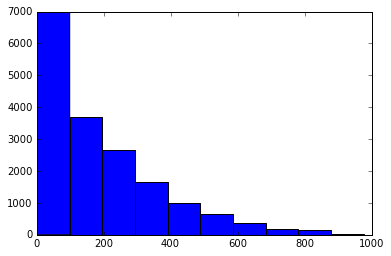

In [3]:
plt.hist(bike_rentals['cnt'])

In [4]:
corrmat=bike_rentals.corr()['cnt'].sort_values()
corrmat

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

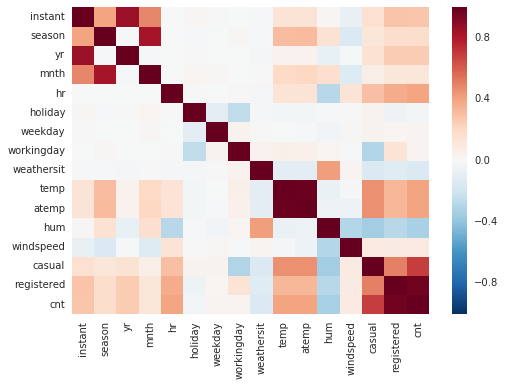

In [5]:
import seaborn as sns
sns.heatmap(bike_rentals.corr())

## Calculating Features


In [6]:
def assign_label(hour):
    if hour>=0 and hour<6:
        return 4
    elif hour>=6 and hour<12:
        return 1
    elif hour>=12 and hour<18:
        return 2
    elif hour>=18 and hour<=24:
        return 3
bike_rentals['time_label']=bike_rentals['hr'].apply(assign_label)

    

## Error Metric
MSE suits for numeric data therefore it suits best for our data

In [7]:
train=bike_rentals.sample(frac=0.8)
test=bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [8]:
features=list(train.columns)
features.remove('cnt')
features.remove('casual')
features.remove('dteday')
features.remove('registered')


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
model=LinearRegression()
model.fit(train[features],train['cnt'])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
predictions=model.predict(test[features])
mse_lr=mean_squared_error(predictions,test['cnt'])
mse_lr



17552.362744277674

In [14]:
np.mean((predictions - test["cnt"]) ** 2)

17552.362744277674

## Error
The error is very high,which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

## Applying Decision Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=1,min_samples_leaf=5)
clf.fit(train[features],train['cnt'])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [16]:
predictions=clf.predict(test[features])
mse_dt=mean_squared_error(predictions,test['cnt'])
mse_dt

9167.729286536249

In [17]:
clf=DecisionTreeClassifier(random_state=1,min_samples_leaf=2)
clf.fit(train[features],train['cnt'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [18]:
predictions=clf.predict(test[features])
mse_dt=mean_squared_error(predictions,test['cnt'])
mse_dt

6631.560126582279

In [19]:
clf=DecisionTreeClassifier(random_state=1,min_samples_leaf=2,max_depth=5)
clf.fit(train[features],train['cnt'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [20]:
predictions=clf.predict(test[features])
mse_dt=mean_squared_error(predictions,test['cnt'])
mse_dt

24335.865362485616

## Decision tree error¶
By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(min_samples_leaf=5)
clf.fit(train[features],train['cnt'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [24]:
predictions=clf.predict(test[features])
mse_rf=mean_squared_error(predictions,test['cnt'])
mse_rf

12365.163118527043

In [26]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[features], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [28]:
predictions = reg.predict(test[features])

np.mean((predictions - test["cnt"]) ** 2)

1810.5096861888924

## Random forest error
By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.